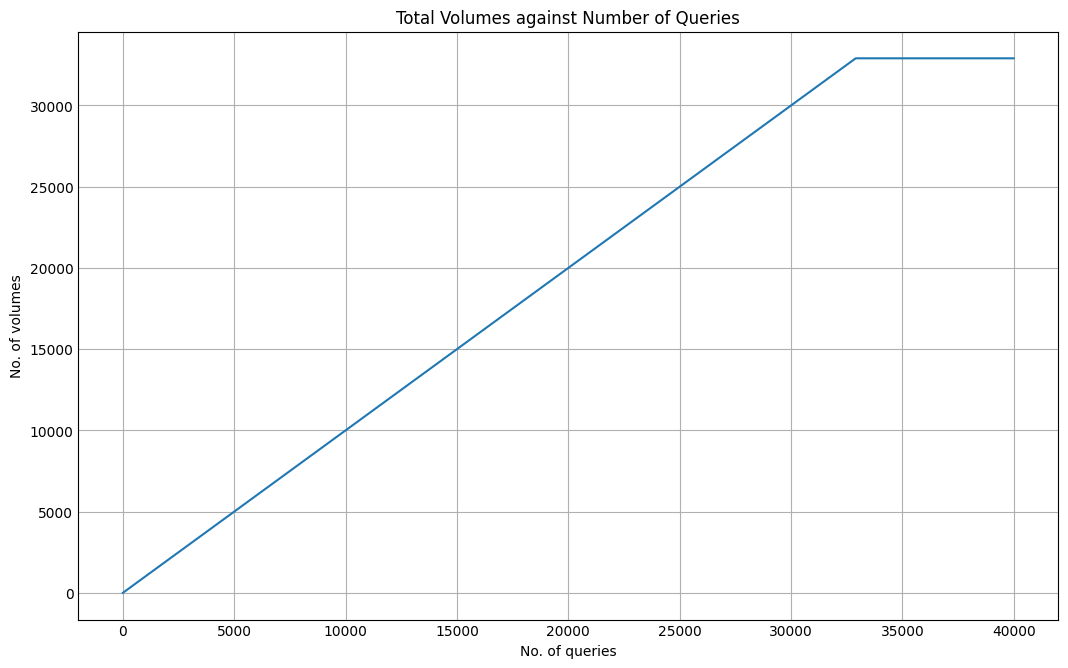

In [18]:
import random
import matplotlib.pyplot as plt

def query_gen():
    query_range_list = []
    possible_queries = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    e = 1
    while e+no_range <= RSEmax:
        node = (e, e+no_range)
        possible_queries.append(node)
        e += 1
    query = random.choice(possible_queries)
    return(query)

RSEmax = 256
max_volumes = int((RSEmax*(RSEmax + 1))/2)
no_of_runs = 10
no_of_queries = 40000
def quad_query(a,b):
    arr = [0 for i in range(b+1)]
    for h in range(a):
        vol_tracker = []
        vol_sum = 0
        for j in range(b):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, b):
                    arr[i+1] = max_volumes*a
                break      
            elif query_asked is not vol_tracker:
                vol_tracker.append(query_asked)
                vol_sum +=1
            else:
                query_asked = query_gen()
            arr[j+1] = arr[j+1] + vol_sum
    for i in range(b):
        arr[i+1] = arr[i+1] /a
    return(arr)

arr = quad_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()
